In [32]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc

# BOKEH
import matplotlib.pyplot as plt

# Local imports
#------------------------------------------------
import WireDAQ.PandasPlus           # Make sure this import is after pandas
import WireDAQ.Constants as cst
import WireDAQ.NXCALS as nx
import WireDAQ.Parser as parser
import WireDAQ.Efficiency as eff

for key in plt.rcParams.keys():
    if 'date.auto' in key:
        plt.rcParams[key] = "%H:%M"
#============================

# Creating NXCALS variable containers
#------------------------------------------------
wires     = {'B1': [nx.NXCALSWire(loc = loc) for loc in ['L1B1','L5B1']],
             'B2': [nx.NXCALSWire(loc = loc) for loc in ['R1B2','R5B2']]}
beams     = [nx.NXCALSBeam(name) for name in ['B1','B2']]
LHC       = nx.NXCALSLHC()
b_slots   = np.arange(3564)
#------------------------------------------------


# Setting default values
#------------------------------------------------
_default_fig_width  = 2000
_default_fig_height = 400
_default_fig_pad    = 100


_default_path     = '/eos/project/l/lhc-lumimod/LuminosityFollowUp/2023/'

In [46]:
FILL   = 9063
device = 'DBLM'

# Finding good path
raw_data        = _default_path  + '/rawdata/'
processed_data  = _default_path  + f'/efficiency_data/{device}'



# # Finding filling pattern
# #-------------------------------------------------
bb_df_b1,bb_df_b2 = parser.fill_filling_pattern(fill=FILL,data_path= raw_data,n_LR = 21)
# #-------------------------------------------------



# Declaring master bin times
#-------------------------------------------------
dt = 60
unix_s,unix_e = parser.fill_unix_times(FILL,data_path=raw_data)
unix_bins     = np.arange(unix_s,unix_e,dt/1e-9)
#-------------------------------------------------

# Import efficiency
#-------------------------------------------------
df_eff = parser.from_parquet2bin(file= processed_data+f'/FILL{FILL}.parquet',bins=unix_bins)
df_eff = parser.make_timestamps(df_eff)
df_eff

,Timestamp,Time,B1:eta,B1:sig_eff,B2:eta,B2:sig_eff
unix,,,,,,
1689173941742613504,2023-07-12 16:59:01.742613504,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1689174001742613504,2023-07-12 17:00:01.742613504,60.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1689174061742613504,2023-07-12 17:01:01.742613504,120.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1689174121742613504,2023-07-12 17:02:01.742613504,180.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1689174181742613504,2023-07-12 17:03:01.742613504,240.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...
1689282001742613504,2023-07-13 23:00:01.742613504,108060.0,"[-0.0001840679245201162, -0.003663947257154648...","[-51.33777004992246, 147.5162829637591, 38.590...","[-0.0001331545122877031, -0.002115092713049544...","[173.792419472057, 37.673911189091434, 13.3202..."
1689282061742613504,2023-07-13 23:01:01.742613504,108120.0,"[0.0005991741640907673, -0.0007732766535362877...","[627.0398235378983, -101.90961404257662, -154....","[0.0005739358950281539, -0.0016496769243614772...","[773.8790025238694, -199.3042534235315, -163.0..."
1689282121742613504,2023-07-13 23:02:01.742613504,108180.0,"[0.0028932917921347507, 0.010819037417050393, ...","[73.43744049399523, 12.840596411584215, 32.033...","[0.0010525201382957422, 0.006586135743390897, ...","[53.431418254944, 20.537971156876115, 459.2317..."


(0.06, 0.2)

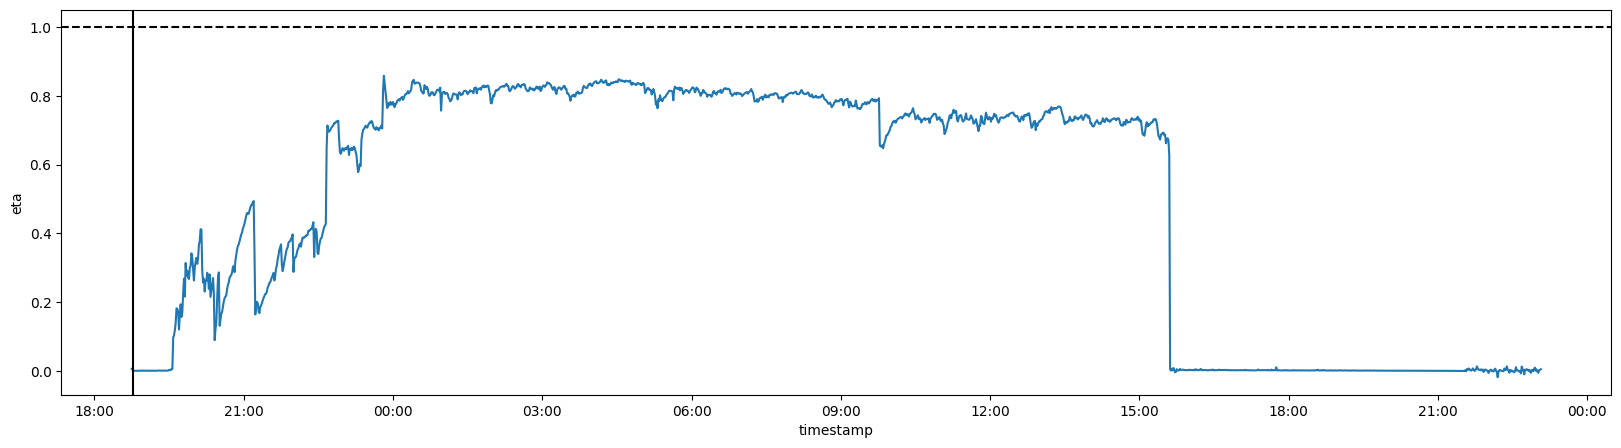

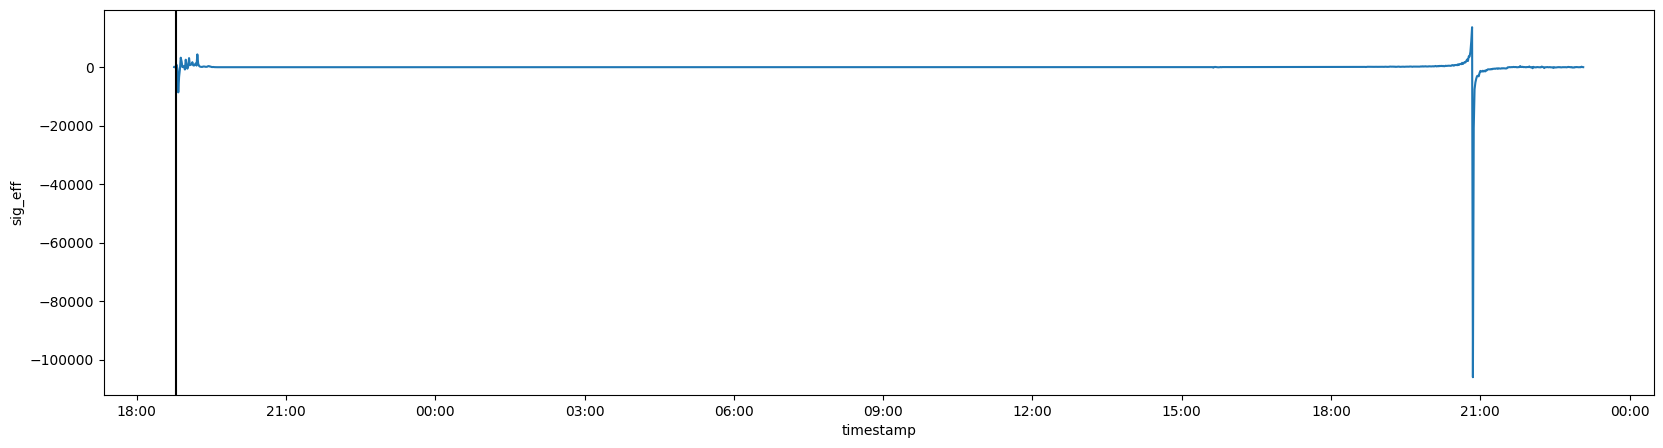

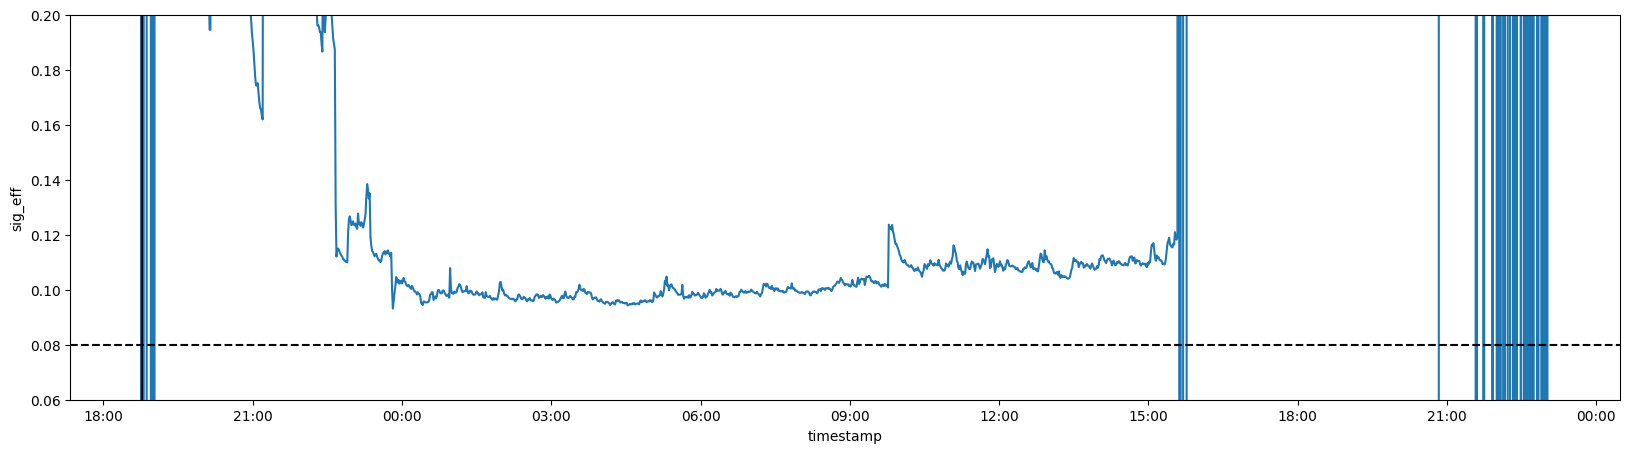

In [47]:
at_unix = 1689180364242613504
idx     = 2922

col_to_plot = 'B1:eta'
data        = df_eff[['Timestamp',col_to_plot]]
bunch_data  = data.set_index('Timestamp')[col_to_plot].apply(lambda x: x[idx]).dropna()

plt.figure(figsize=(20,5))
plt.plot(bunch_data)
plt.xlabel('timestamp')
plt.ylabel('eta')
plt.axvline(data.loc[at_unix:].Timestamp.values[0],color='k')
plt.axhline(1,color='k',ls='--')


col_to_plot = 'B1:sig_eff'
data        = df_eff[['Timestamp',col_to_plot]]
bunch_data  = data.set_index('Timestamp')[col_to_plot].apply(lambda x: x[idx]).dropna()

plt.figure(figsize=(20,5))
plt.plot(bunch_data)
plt.xlabel('timestamp')
plt.ylabel('sig_eff')
plt.axvline(data.loc[at_unix:].Timestamp.values[0],color='k')


plt.figure(figsize=(20,5))
plt.plot(bunch_data)
plt.xlabel('timestamp')
plt.ylabel('sig_eff')
plt.axvline(data.loc[at_unix:].Timestamp.values[0],color='k')
plt.axhline(80e-3,color='k',ls='--')
plt.ylim(60e-3,200e-3)

